# 11 - Infer Road Speeds

In [1]:
import folium
import pandas as pd
import h3.api.numpy_int as h3

from folium.plugins import Draw
from db.api import TrajDb, SpeedDb
from valhalla.utils import decode_polyline
from valhalla import Actor, get_config

In [2]:
def get_edge_stats(h3_ini: int, h3_end: int) -> pd.DataFrame:
    sql = """
    select dt
    from segment
    where h3_ini=? and h3_end=?
    """
    db = SpeedDb()
    return db.query_df(sql, (h3_ini, h3_end))

In [3]:
def get_edge_counts() -> pd.DataFrame:
    sql = """
    select   h3_ini
    ,        h3_end
    ,        count(0) as n
    from     segment
    group by h3_ini, h3_end
    """
    db = SpeedDb()
    return db.query_df(sql)

In [4]:
edge_df = get_edge_stats(644705898997044768, 644705898997043978)

<Axes: >

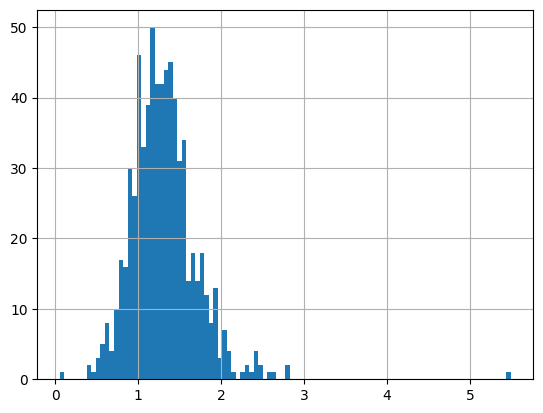

In [5]:
edge_df["dt"].hist(bins=100)

In [6]:
n_df = get_edge_counts()

<Axes: >

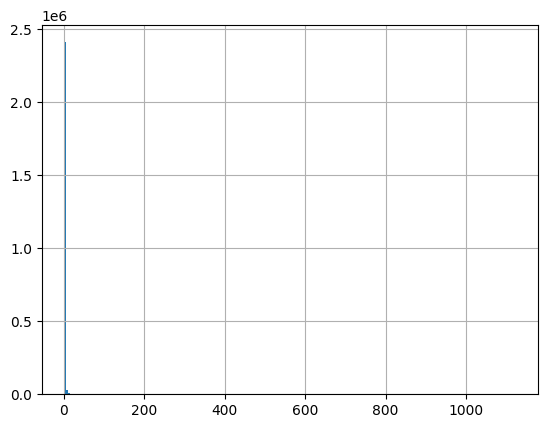

In [7]:
n_df["n"].hist(bins=250)

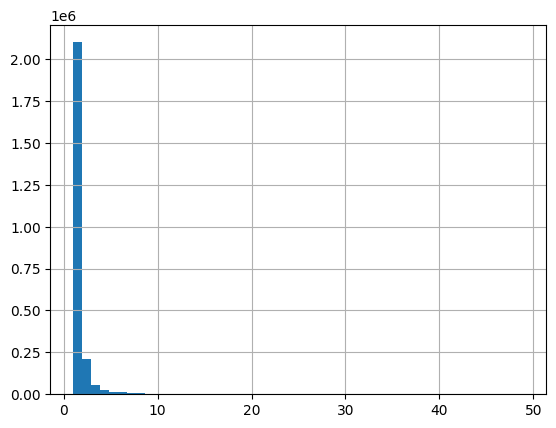

In [18]:
axes = n_df[n_df["n"] < 50]["n"].hist(bins=50)

In [15]:
len(axes.flatten())

AttributeError: 'Axes' object has no attribute 'flatten'

In [ ]:
edge_df["dt"].mean(), edge_df["dt"].std()

In [ ]:
edge_df["dt"].median()

In [ ]:
def get_actor(tiles='./valhalla/custom_files/valhalla_tiles.tar',
              verbose=False) -> Actor:
    config = get_config(tile_extract=tiles, verbose=verbose)
    return Actor(config)

In [ ]:
def fit_map(folium_map):
    db = TrajDb()
    sql = """
    select min(lat) as min_lat
    ,      max(lat) as max_lat
    ,      min(lon) as min_lon
    ,      max(lon) as max_lon
    from   h3_node;"""
    min_lat, max_lat, min_lon, max_lon = db.query(sql)[0]
    folium_map.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]])
    return folium_map

In [ ]:
def create_map():
    folium_map = folium.Map(prefer_canvas=True,
                            # tiles="cartodbpositron",
                            max_zoom=21,
                            control_scale=True)

    # draw_options = {
    #     "polygon": False,
    #     "rectangle": False,
    #     "circle": False,
    #     "marker": False,
    #     "circlemarker": False
    # }
    # 
    # draw = Draw(export=True,
    #             # filename="/Users/joafigu/code/python/eved-explore/endpoints.geojson",
    #             draw_options=draw_options)
    # draw.add_to(folium_map)
    folium_map = fit_map(folium_map)
    return folium_map

In [ ]:
actor = get_actor()

In [ ]:
route_params = {
    "locations": [
        {
            "lat": 42.220268,
            "lon": -83.732389
        },
        {
            "lat": 42.325853,
            "lon": -83.749131
        }
    ],
    "costing": "auto",
    "id": "test-route",
    "directions_type": "maneuvers"
}

In [ ]:
route = actor.route(route_params)

In [ ]:
route["trip"].keys()

In [ ]:
route["trip"]["legs"][0]["shape"]

In [ ]:
decode_polyline(route["trip"]["legs"][0]["shape"])